# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [62]:

class walker:
    def __init__(self, x0, ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        self.step_size = step_size
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        
        positions[0] = self.pos
        for i in range(1,n+1):
            positions[i] = self.pickStep() + positions[i-1]
        
        return positions

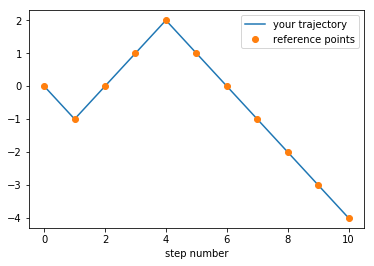

In [56]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

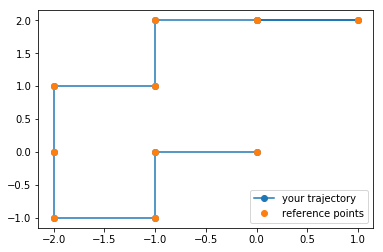

In [57]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


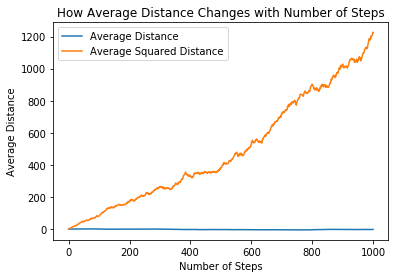

In [58]:
nsteps = 1000
ndim = 1
nwalkers = 100

steps = []

all_steps = []

for i in range(nwalkers):
    w = walker(numpy.zeros(ndim))
    ys = w.doSteps(nsteps)
    ys = numpy.asarray(ys)
    all_steps.append(ys)

#average position    

averages = []

for i in range(len(all_steps[0])):
    things = []
    for j in range(len(all_steps)):
        things.append(all_steps[j][i])
    average = numpy.average(things)
    averages.append(average)
    
#average squared position    

squares = []
    
for i in range(len(all_steps[0])):
    things = []
    for j in range(len(all_steps)):
        things.append(all_steps[j][i]**2)
    average = numpy.average(things)
    squares.append(average)
    
#plot

x_values = numpy.arange(0, nsteps + 1, 1)

plt.plot(x_values, averages, label = 'Average Distance')
plt.plot(x_values, squares, label = 'Average Squared Distance', zorder = 3)
plt.xlabel('Number of Steps')
plt.ylabel('Average Distance')
plt.legend()
plt.title('How Average Distance Changes with Number of Steps')
plt.show()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


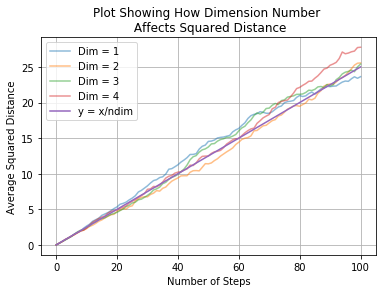

In [59]:
nsteps = 100
nwalkers = 400
ndim = 4
dimensions = range(1,ndim + 1)

#generating data

all_steps = []

for i in dimensions:
    dim = []
    for j in range(nwalkers):
        w = walker(numpy.zeros(ndim), ndim = ndim)
        ys = w.doSteps(nsteps)
        dim.append(ys)
    all_steps.append(dim)

#calculating average squared distance   
    
average_distance = []

for k in dimensions:
    data = all_steps[k - 1]
    transposed = numpy.transpose(data)
    avg_dist = []
    for j in range(len(transposed)):
        position = transposed[j]
        avg_dists = []
        for i in range(len(position)):
            avg_position_squared = numpy.average(position[i]**2)
            avg_dists.append(avg_position_squared)
        avg_dist.append(avg_dists)
    average_distance.append(avg_dist)

#plotting
    
labels = []

for i in dimensions:
    labels.append(str(i))

sum = [0] * len(average_distance)    

for i in range(len(average_distance)):
    x_values = numpy.arange(0, nsteps + 1, 1)
    plt.plot(x_values, average_distance[i][0], label = 'Dim = ' + labels[i], alpha = 0.5)
    
x_values = numpy.arange(0, nsteps + 1, 1)
y_values = []
for i in range(len(x_values)):
    y_values.append(x_values[i] / ndim)
    
plt.plot(x_values, y_values, zorder = ndim + 1, label = 'y = x/ndim')
    
plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Average Squared Distance')
plt.title('Plot Showing How Dimension Number \n Affects Squared Distance')
plt.grid()
plt.show()

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


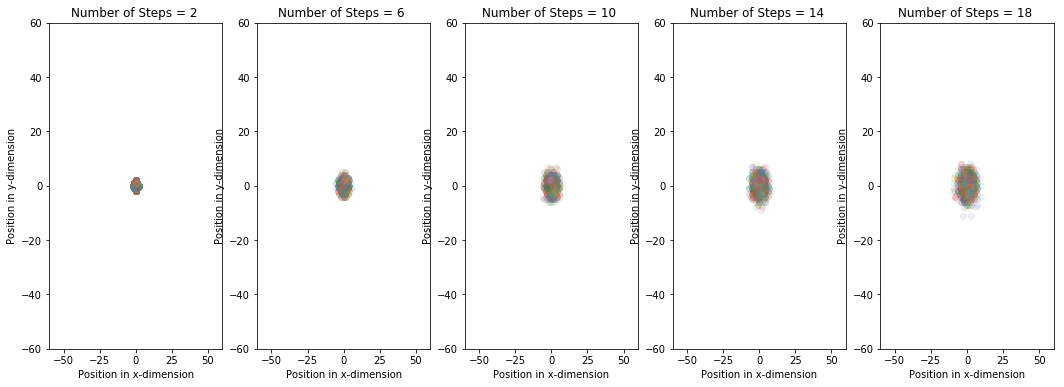

In [77]:
steps = numpy.arange(2,20,4)

ndim = 2
nwalkers = 1000
nsteps = max(steps)
rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

all_steps = []

walker.step_size = 0.05

for i in range(0, nwalkers, 1):
    walker.pos = rand_pos[j]
    w = walker(numpy.zeros(ndim), ndim = ndim)
    ys = w.doSteps(nsteps)
    all_steps.append(ys)

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(x, len(steps) * x))

subplot = str(1) + str(len(steps)) + str(1)
subplot = int(subplot)

for i, nsteps in enumerate(steps):
    plt.subplot(subplot+i)
    plt.xlim((-60, 60))
    plt.ylim((-60, 60))
    plt.title("Number of Steps = {} ".format(str(steps[i])))
    plt.xlabel('Position in x-dimension')
    plt.ylabel('Position in y-dimension')
    for j in range(nwalkers):
        plt.scatter(all_steps[j][nsteps][0], all_steps[j][nsteps][1], alpha=0.1)